# k-최근접이웃의 한계 및 선형 회귀

In [1]:
import numpy as np

In [2]:
### 데이터 생성하기 
perch_length= np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# 훈련및 테스트데이터분류하여 가지고오기
# 총 4개의 변수값을 반환해 줍니다

# test_size : 테스트데이터의 비율
# train_size : 훈련데이터의 비율
# 기본적으로 train : test = 75:25의 비율을 사용 (대략적인 비율)
# 일반적으로 훈련과 테스트 비율은 7:3 또는 7.5:2.5 비율로 사용 ******* 시험출제 *******
train_input, test_input, train_target, test_target = \
    train_test_split(perch_length,perch_weight, random_state=42)

In [5]:
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)
print(train_input)
print('----------')
print(test_input)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
----------
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [6]:
from sklearn.neighbors import KNeighborsRegressor

In [7]:
from sklearn.neighbors import KNeighborsRegressor

### 클래스(모델) 이름 :KNeighborsRegressor()
knr = KNeighborsRegressor()
knr

KNeighborsRegressor()

In [8]:
knr = KNeighborsRegressor(n_neighbors=3)

In [9]:
### 훈련데이터 학습 시키기 : 훈련모델 생성하기
knr.fit(train_input,train_target) # 따로 저장안해도 knr에 저장 

KNeighborsRegressor(n_neighbors=3)

In [10]:
knr.score(test_input, test_target)

0.9746459963987609

In [11]:
#예측데이터 : 50 
### 산점도로 시각화 : 훈련데이터와 예측데이터, 이웃데이터 포함
knr.predict([[50]])

array([1033.33333333])

In [12]:
# 이웃데이터 추출하기 
distances, indexes = knr.kneighbors([[50]])

Text(0.5, 1.0, '농어의 길이에 따른 무게 그래프')

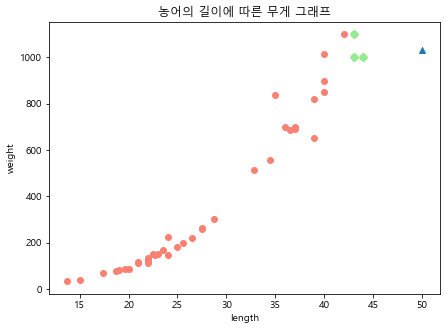

In [13]:
import matplotlib.pyplot as plt

plt.rc('font',family = 'Malgun Gothic')

plt.figure(figsize = (7,5))
plt.scatter(train_input,train_target,c='salmon')

plt.scatter(50,knr.predict([[50]]),marker='^')
plt.scatter(train_input[indexes],train_target[indexes],marker = 'D',c='lightgreen')


plt.xlabel('length')
plt.ylabel('weight')
plt.title('농어의 길이에 따른 무게 그래프')

In [14]:
## 훈련데이터 범위내에서 특정값 예측시에는 사용가능하나 훈련데이터 밖의 값은 예측 불가 

### 선형회귀 (Linear Regression)
#### - 많이 사용되는 대표적인 회귀 알고리즘
#### - 비교적 간단하고, 성능이 뛰어나기 때문에 회귀모델 수행시 초반에 주로 진행
#### - 선형회귀의 역할 : 하나의 특성을 가장 잘 나타내는 직선을 찾아내는 것이 주 역할
#### - 직선을 '추세선' 이라고 합니다
#### - 선형 회귀 알고리즘 : 1차방정식 ( y = ax + b)
#### - 선형회귀 클래스(모델) : LinearTegression
#### - 사용되는 패키지 : sklearn_linear_model
#### * 다항 : 2차방정식 쓰는 모델
#### * 다중 : 다항의 연속성, 여러개의 항목 사용 

In [17]:
### 선형회귀 클래스(모델) 생성하기
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [ ]:
### 사용데이터 : train_input, train_target, test_input, test_target
### 예측데이티 : 길이 50cm

# lr 모델 훈련 > 예측 데이터로 예측하기


In [19]:
lr.fit(train_input, train_target)

LinearRegression()

In [20]:
lr.score(test_input, test_target)

0.824750312331356

In [21]:
lr.predict([[50]])

array([1241.83860323])

In [22]:
### 일차방정식의 기울기와  y 절편값 확인하기
# 일차 방정식 : y = ax + b
# a : 기울기(coef_)
# b : y절편(intercept_)

print(lr.coef_, lr.intercept_)

# 기울기 : 39
# y 절편 : -709

[39.01714496] -709.0186449535474


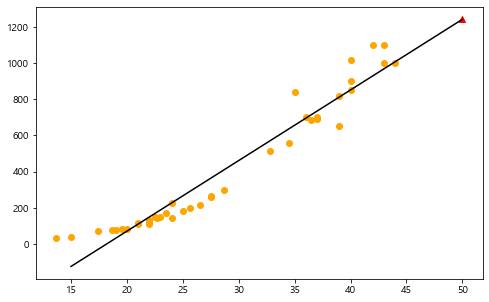

In [39]:
### 추세선을 이용하여 예측데이터 예측가능한지 확인하기
# - 예측데이터로 사용 할 수있을지 확인 
# - 산점도를 이용해서 확인하기
# - 훈련데이터, 예측데이터 산점도로 그리기
plt.figure(figsize=(8,5))
plt.scatter(train_input, train_target, c = 'orange')
plt.scatter(50,lr.predict([[50]]), marker = '^',c ='red')

# 추세선 그리기
# 추세선 : 선형회귀 알고리즘(1차방정식)이 훈련데이터에서 찾은 최적의 직선을 의미합니다
# x , y 범위 y 범위는 일차방정식에 x 값넣어서 지정
plt.plot([15,50],[lr.coef_*15+lr.intercept_,lr.coef_*50+lr.intercept_],c='black') 
plt.show()

In [40]:
### 훈련데이터와 테스트데이터의 과적합여부 확인하기
# - kNN은 과소적합이 나왔었다
# LR 모델은 개선이 되었는지 확인 
# score로 과적합 여부 확인 

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

# [해석]
# - 테스트 결과가 다소 낮게 나왔으며, 훈련데이터는 높은편,
# - 다소 차이는 있으나 우수한 모델로 평가 할 수 있다
# - 단 , 훈련데이터와 테스트데이터의 결정계수의 차이는 의심을 해봐야 한다

### 그래프 왼쪽 하단의 산점도 분포가 조금 특이합니다
# - 약간의 round(곡선)을 보임
# - 추세선 왼쪽 하단으로 직선을 연장했을 때 y의 값이 0 이하로 내려가는 것을 볼 수 있습니다
# - 무게는 0보다 작을 수 없습니다
# - 음수를 예측하면 잘못된 모델입니다.


0.9398463339976041
0.824750312331356


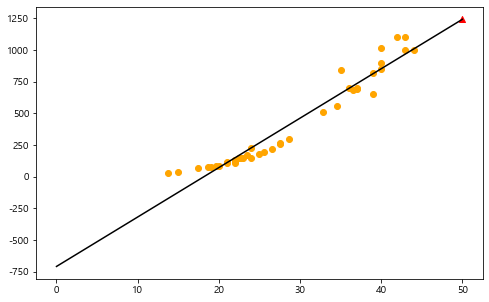

In [44]:
### 추세선을 이용하여 예측데이터 예측가능한지 확인하기
# - 예측데이터로 사용 할 수있을지 확인 
# - 산점도를 이용해서 확인하기
# - 훈련데이터, 예측데이터 산점도로 그리기
plt.rc('font',family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False ## 음수부호 표시하기
plt.figure(figsize=(8,5))
plt.scatter(train_input, train_target, c = 'orange')
plt.scatter(50,lr.predict([[50]]), marker = '^',c ='red')

# 추세선 그리기
# 추세선 : 선형회귀 알고리즘(1차방정식)이 훈련데이터에서 찾은 최적의 직선을 의미합니다
# x , y 범위 y 범위는 일차방정식에 x 값넣어서 지정
plt.plot([0,50],[lr.coef_*0+lr.intercept_,lr.coef_*50+lr.intercept_],c='black')
plt.show()

## 다항 회귀 분석
#### - 다항식을 사용한 선형회귀를 *다항회귀* 라고 합니다
#### - 다항식(이차방정식) : y =ax^2 +bx +c
#### - a,b : 계수 (기울기 포함)
#### - c : y절편

In [ ]:
### 훈련데이터 train_input을 [[제곱된 값 1개 , 원래값 1개],[],[]]
### 변수 : train_poly

In [51]:
# 튜플 형태로 넣어주기 
train_poly = np.column_stack(((train_input**2),train_input))
train_poly.shape

(42, 2)

In [52]:
test_poly = np.column_stack(((test_input**2),test_input))
test_poly.shape

(14, 2)

0.9775935108325122
[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


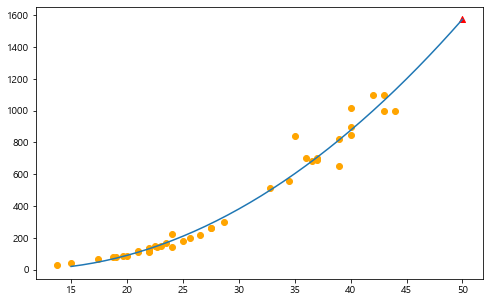

In [87]:
# - 객체(모델) 생성
lr_new = LinearRegression()

# - 훈련모델 생성 
lr_new.fit(train_poly,train_target)

# - 평가 
print(lr_new.score(test_poly, test_target))

# - 예측데이터 : 길이 50으로 무게 예측
print(lr_new.predict([[50**2 , 50]]))

# - 계수,절편 확인(coef_, intercept_)
# - 첫번째 a 값 , 두번째 b 값 , y 절편
print(lr_new.coef_,lr_new.intercept_)

# - 산점도 그리기 : 훈련데이터, 예측데이터, 추세선
plt.rc('font',family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False ## 음수부호 표시하기
plt.figure(figsize=(8,5))
plt.scatter(train_poly[:,1], train_target, c = 'orange')
plt.scatter(50,lr_new.predict([[50**2 , 50]]), marker = '^',c ='red')

# # 추세선 그리기
# 추세선 : 선형회귀 알고리즘(1차방정식)이 훈련데이터에서 찾은 최적의 곡선을 의미합니다
# x , y 범위 y 범위는 일차방정식에 x 값넣어서 지정
# 곡선은 점 하나 하나 다 필요하다 
point = np.arange(15,51) # 15 ~ 50까지 
plt.plot(point,lr_new.coef_[0]*(point**2)+lr_new.coef_[1]*point+lr_new.intercept_)  
plt.show()


# 일차함수 그리는것과 다르다 
# 일차함수는 범위 시작점 끝점 두군데 지정해서 y값 두개를 리스트로 만들어 그래프 그림
# 이차 함수는 시작점 끝점이 아니라 전체값을 다 지정해줘야하기때문에 x 값을 배열로 만들어서 하나하나 값을 다 찍어서 그래프 그려준다

In [82]:
np.arange(15,51) # x 값의 집합 

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50])

In [89]:
### 훈련데이터와 테스트데이터의 과적합여부 확인하기
# - kNN은 과소적합이 나왔었다
# LR 모델은 개선이 되었는지 확인 
# score로 과적합 여부 확인 

print(lr_new.score(train_poly, train_target))
print(lr_new.score(test_poly, test_target))

# [해석]
# 전체적으로 정확도 감소
# 그러나, 훈련/테스트 결정계수는 유사하게 가까워졌기에 우수한 모델이라고 할 수 있음
# 다만, 아직 훈련이 테스트보다 낮은 과소적합을 보임

## ..? 어떻게 할 수 있을까..? 
# -복잡도를 줄 수 있는 모델을 찾아야 한다 !! → 다중회귀분석! 

0.9706807451768623
0.9775935108325122
